In [1]:
import tensorflow as tf  
  

print("TensorFlow 版本:", tf.__version__)  
  

hello = tf.constant('Hello, TensorFlow!')  
  

print(hello.numpy())  

TensorFlow 版本: 2.6.0
b'Hello, TensorFlow!'


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
import os  
import cv2  
import numpy as np  
from sklearn.model_selection import train_test_split  
  
# 设置数据集路径  
data_dir = 'D:\CV_data'  
categories = ['cat', 'cow', 'dog','fowl','horse','squirrel']  
target_size = (64, 64)  
  

images = []  
labels = []  
  

for category in categories:  
    category_dir = os.path.join(data_dir, category)  
    for img_name in os.listdir(category_dir):  
        img_path = os.path.join(category_dir, img_name)  
        
        img = cv2.imread(img_path)  
        if img is not None:  
           
            img_resized = cv2.resize(img, target_size)  
             
            images.append(img_resized)  
          
            labels.append(categories.index(category))  
  
  
images = np.array(images)  
labels = np.array(labels)   
  
 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)  
  

train_images = train_images / 255.0  
test_images = test_images / 255.0  

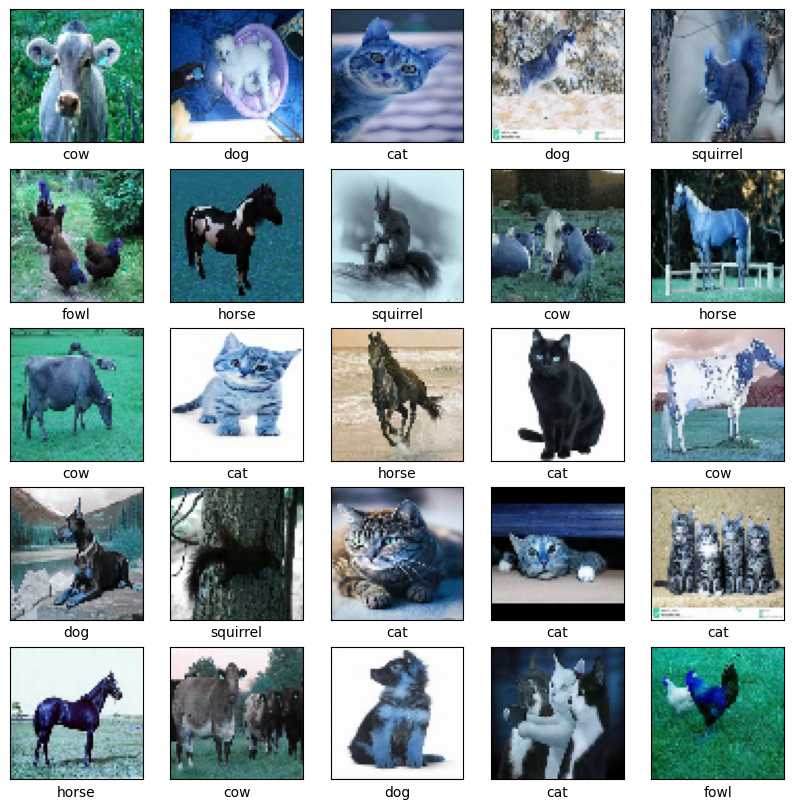

In [3]:

class_names = ['cat', 'cow', 'dog','fowl','horse','squirrel']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra indexplt.xlabel(class names[train labels[i][0]])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(6))

# Display the architecture of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
56/56 [==============================] - 4s 75ms/step - loss: 1.7798 - accuracy: 0.2096 - val_loss: 1.7179 - val_accuracy: 0.2758
Epoch 2/10
56/56 [==============================] - 4s 71ms/step - loss: 1.6243 - accuracy: 0.3264 - val_loss: 1.5458 - val_accuracy: 0.3632
Epoch 3/10
56/56 [==============================] - 4s 69ms/step - loss: 1.4007 - accuracy: 0.4303 - val_loss: 1.4997 - val_accuracy: 0.3341
Epoch 4/10
56/56 [==============================] - 4s 69ms/step - loss: 1.2429 - accuracy: 0.5197 - val_loss: 1.4895 - val_accuracy: 0.4641
Epoch 5/10
56/56 [==============================] - 4s 68ms/step - loss: 1.1016 - accuracy: 0.5702 - val_loss: 1.4015 - val_accuracy: 0.4619
Epoch 6/10
56/56 [==============================] - 4s 68ms/step - loss: 0.9083 - accuracy: 0.6596 - val_loss: 1.3941 - val_accuracy: 0.4955
Epoch 7/10
56/56 [==============================] - 4s 72ms/step - loss: 0.7824 - accuracy: 0.7090 - val_loss: 1.6124 - val_accuracy: 0.4888
Epoch 8/10
56

14/14 - 0s - loss: 1.9703 - accuracy: 0.4843
0.48430493474006653


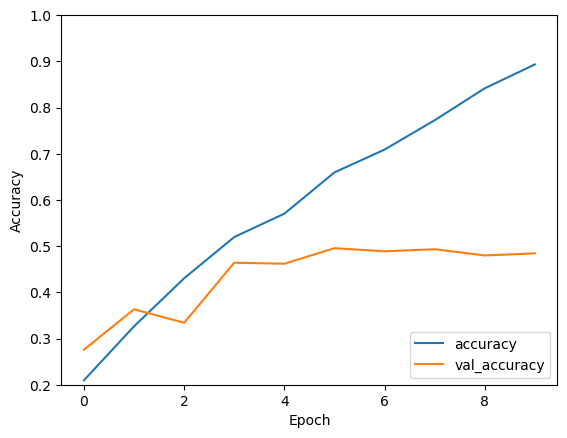

In [7]:
# Evaluate the model
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)